In [ ]:
import pandas as pd

In [ ]:
# Loading the dataset
data = pd.read_csv('Stock_Data_10_Years.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2011-09-12,258.012909,265.001709,257.783752,264.070190,5360819
1,2011-09-13,265.006683,265.943176,260.722748,263.771332,4726048
2,2011-09-14,265.300598,267.472443,261.928223,265.041565,5408999
3,2011-09-15,266.750153,271.472443,266.281921,270.266968,5943796
4,2011-09-16,271.382782,272.398987,270.555878,272.319275,7095095


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for normalization
numerical_cols = data.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2011-09-12,0.005201,0.005295,0.006877,0.006455,0.214372
1,2011-09-13,0.007816,0.005646,0.007976,0.006343,0.188951
2,2011-09-14,0.007926,0.006215,0.008427,0.006819,0.216301
3,2011-09-15,0.008468,0.007705,0.010056,0.008776,0.237719
4,2011-09-16,0.010200,0.008050,0.011655,0.009545,0.283826


In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume
0,2011-09-12,0.005201,0.005295,0.006877,0.006455,0.214372
1,2011-09-13,0.007816,0.005646,0.007976,0.006343,0.188951
2,2011-09-14,0.007926,0.006215,0.008427,0.006819,0.216301
3,2011-09-15,0.008468,0.007705,0.010056,0.008776,0.237719
4,2011-09-16,0.010200,0.008050,0.011655,0.009545,0.283826


In [ ]:
data = pd.DataFrame(data)

In [ ]:
import numpy as np
def create_sequences(data, window_size, target_column=-1):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i + window_size, target_column])
    return np.array(X), np.array(y)

seq_lengths = [10, 60, 120]
for seq_length in seq_lengths:
    X, y = create_sequences(data.drop('Date', axis=1).values, window_size=seq_length, target_column=-1)
    print(f"Shape of X for sequence length {seq_length}: {X.shape}")
    print(f"Shape of y for sequence length {seq_length}: {y.shape}")

Shape of X for sequence length 10: (2507, 10, 5)
Shape of y for sequence length 10: (2507,)
Shape of X for sequence length 60: (2457, 60, 5)
Shape of y for sequence length 60: (2457,)
Shape of X for sequence length 120: (2397, 120, 5)
Shape of y for sequence length 120: (2397,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

In [ ]:
# Define the models
def create_simple_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_gru(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

## 10 Days

In [ ]:
# Sequence length for 10 days
seq_length_10 = 10
input_shape_10 = (seq_length_10, X_train.shape[2])

# Create and train models for 10 days
simple_rnn_model_10 = create_simple_rnn(input_shape_10)
history_rnn_10 = simple_rnn_model_10.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

lstm_model_10 = create_lstm(input_shape_10)
history_lstm_10 = lstm_model_10.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

gru_model_10 = create_gru(input_shape_10)
history_gru_10 = gru_model_10.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0075 - mae: 0.0554 - val_loss: 0.0013 - val_mae: 0.0316
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0028 - mae: 0.0316 - val_loss: 6.3156e-04 - val_mae: 0.0181
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0025 - mae: 0.0262 - val_loss: 5.8179e-04 - val_mae: 0.0150
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023 - mae: 0.0275 - val_loss: 6.1423e-04 - val_mae: 0.0148
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0020 - mae: 0.0267 - val_loss: 5.9030e-04 - val_mae: 0.0148
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mae: 0.0310 - val_loss: 5.9814e-04 - val_mae: 0.0164
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027 - mae: 0.0297 - val_loss: 5.8614e-04 - val_mae: 0.0147
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mae: 0.0313 - val_loss: 7.4802e-04 - val_mae: 0.0212
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluation
# store results
results_10 = {}

# Evaluate models
test_mse_rnn_10, test_mae_rnn_10 = simple_rnn_model_10.evaluate(X_test, y_test)
test_mse_lstm_10, test_mae_lstm_10 = lstm_model_10.evaluate(X_test, y_test)
test_mse_gru_10, test_mae_gru_10 = gru_model_10.evaluate(X_test, y_test)

results_10['simple_rnn_10'] = (test_mse_rnn_10, test_mae_rnn_10)
results_10['lstm_10'] = (test_mse_lstm_10, test_mae_lstm_10)
results_10['gru_10'] = (test_mse_gru_10, test_mae_gru_10)

# Print evaluation results for 10 days
print(f"Simple RNN (10) - Test MSE: {test_mse_rnn_10}, Test MAE: {test_mae_rnn_10}")
print(f"LSTM (10) - Test MSE: {test_mse_lstm_10}, Test MAE: {test_mae_lstm_10}")
print(f"GRU (10) - Test MSE: {test_mse_gru_10}, Test MAE: {test_mae_gru_10}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.7253e-04 - mae: 0.0179
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1145e-04 - mae: 0.0171
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0539e-04 - mae: 0.0173
Simple RNN (10) - Test MSE: 0.0008281093905679882, Test MAE: 0.022579388692975044
LSTM (10) - Test MSE: 0.0006581798079423606, Test MAE: 0.016101347282528877
GRU (10) - Test MSE: 0.0005435828352347016, Test MAE: 0.01591417007148266


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred.flatten()) / y_true)) * 100
    smape = np.mean(2 * np.abs(y_pred.flatten() - y_true) / (np.abs(y_true) + np.abs(y_pred.flatten()))) * 100

    return mse, mae, r_squared, mape, smape

In [ ]:
# Make predictions and calculate metrics for 10 days models
y_pred_rnn_10 = simple_rnn_model_10.predict(X_test)
y_pred_lstm_10 = lstm_model_10.predict(X_test)
y_pred_gru_10 = gru_model_10.predict(X_test)

# Calculate metrics for each model
mse_rnn_10, mae_rnn_10, r2_rnn_10, mape_rnn_10, smape_rnn_10 = calculate_metrics(y_test, y_pred_rnn_10)
mse_lstm_10, mae_lstm_10, r2_lstm_10, mape_lstm_10, smape_lstm_10 = calculate_metrics(y_test, y_pred_lstm_10)
mse_gru_10, mae_gru_10, r2_gru_10, mape_gru_10, smape_gru_10 = calculate_metrics(y_test, y_pred_gru_10)

# Store the results for 10 days
results_10['simple_rnn_10_metrics'] = (mse_rnn_10, mae_rnn_10, r2_rnn_10, mape_rnn_10, smape_rnn_10)
results_10['lstm_10_metrics'] = (mse_lstm_10, mae_lstm_10, r2_lstm_10, mape_lstm_10, smape_lstm_10)
results_10['gru_10_metrics'] = (mse_gru_10, mae_gru_10, r2_gru_10, mape_gru_10, smape_gru_10)

# Print metrics for each model with 10 days
print(f"Simple RNN (10) - MSE: {mse_rnn_10}, MAE: {mae_rnn_10}, R2: {r2_rnn_10}, MAPE: {mape_rnn_10}, sMAPE: {smape_rnn_10}")
print(f"LSTM (10) - MSE: {mse_lstm_10}, MAE: {mae_lstm_10}, R2: {r2_lstm_10}, MAPE: {mape_lstm_10}, sMAPE: {smape_lstm_10}")
print(f"GRU (10) - MSE: {mse_gru_10}, MAE: {mae_gru_10}, R2: {r2_gru_10}, MAPE: {mape_gru_10}, sMAPE: {smape_gru_10}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Simple RNN (10) - MSE: 0.0008281094132405999, MAE: 0.02257938705843588, R2: -0.005819558522795809, MAPE: 45.19687404021715, sMAPE: 33.458530822374776
LSTM (10) - MSE: 0.0006581798463317683, MAE: 0.01610134726209753, R2: 0.20057645537996127, MAPE: 22.535343858440417, sMAPE: 23.74174721389113
GRU (10) - MSE: 0.0005435827830512426, MAE: 0.015914169635029788, R2: 0.339765753018507, MAPE: 25.717260410057115, sMAPE: 23.943507650085692


## 60 Days

In [ ]:
# Sequence length for 60 days
seq_length_60 = 60
input_shape_60 = (seq_length_60, X_train.shape[2])

# Training for 60 days
simple_rnn_model_60 = create_simple_rnn(input_shape_60)
history_rnn_60 = simple_rnn_model_60.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

lstm_model_60 = create_lstm(input_shape_60)
history_lstm_60 = lstm_model_60.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

gru_model_60 = create_gru(input_shape_60)
history_gru_60 = gru_model_60.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0158 - mae: 0.0778 - val_loss: 8.4743e-04 - val_mae: 0.0225
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040 - mae: 0.0371 - val_loss: 6.1505e-04 - val_mae: 0.0154
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - mae: 0.0295 - val_loss: 8.7468e-04 - val_mae: 0.0192
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - mae: 0.0306 - val_loss: 5.9010e-04 - val_mae: 0.0158
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - mae: 0.0288 - val_loss: 8.0935e-04 - val_mae: 0.0179
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - mae: 0.0283 - val_loss: 6.6821e-04 - val_mae: 0.0156
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021 - mae: 0.0277 - val_loss: 5.9755e-04 - val_mae: 0.0162
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - mae: 0.0308 - val_loss: 6.3805e-04 - val_mae: 0.0180
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15

In [ ]:
# Evaluation
# store results
results_60 = {}

# Evaluate models
test_mse_rnn_60, test_mae_rnn_60 = simple_rnn_model_60.evaluate(X_test, y_test)
test_mse_lstm_60, test_mae_lstm_60 = lstm_model_60.evaluate(X_test, y_test)
test_mse_gru_60, test_mae_gru_60 = gru_model_60.evaluate(X_test, y_test)

results_60['simple_rnn_60'] = (test_mse_rnn_60, test_mae_rnn_60)
results_60['lstm_60'] = (test_mse_lstm_60, test_mae_lstm_60)
results_60['gru_60'] = (test_mse_gru_60, test_mae_gru_60)

# Print evaluation results for 60 days
print(f"Simple RNN (60) - Test MSE: {test_mse_rnn_60}, Test MAE: {test_mae_rnn_60}")
print(f"LSTM (60) - Test MSE: {test_mse_lstm_60}, Test MAE: {test_mae_lstm_60}")
print(f"GRU (60) - Test MSE: {test_mse_gru_60}, Test MAE: {test_mae_gru_60}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6480e-04 - mae: 0.0186
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.0341e-04 - mae: 0.0197
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.8415e-04 - mae: 0.0249
Simple RNN (60) - Test MSE: 0.0006207785336300731, Test MAE: 0.019877905026078224
LSTM (60) - Test MSE: 0.0008866536663845181, Test MAE: 0.02004820667207241
GRU (60) - Test MSE: 0.0014163423329591751, Test MAE: 0.03164044767618179


In [ ]:
# Make predictions and calculate metrics for 60 days models
y_pred_rnn_60 = simple_rnn_model_60.predict(X_test)
y_pred_lstm_60 = lstm_model_60.predict(X_test)
y_pred_gru_60 = gru_model_60.predict(X_test)

# Calculate metrics for each model
mse_rnn_60, mae_rnn_60, r2_rnn_60, mape_rnn_60, smape_rnn_60 = calculate_metrics(y_test, y_pred_rnn_60)
mse_lstm_60, mae_lstm_60, r2_lstm_60, mape_lstm_60, smape_lstm_60 = calculate_metrics(y_test, y_pred_lstm_60)
mse_gru_60, mae_gru_60, r2_gru_60, mape_gru_60, smape_gru_60 = calculate_metrics(y_test, y_pred_gru_60)

# Store the results for 60 days
results_60['simple_rnn_60_metrics'] = (mse_rnn_60, mae_rnn_60, r2_rnn_60, mape_rnn_60, smape_rnn_60)
results_60['lstm_60_metrics'] = (mse_lstm_60, mae_lstm_60, r2_lstm_60, mape_lstm_60, smape_lstm_60)
results_60['gru_60_metrics'] = (mse_gru_60, mae_gru_60, r2_gru_60, mape_gru_60, smape_gru_60)

# Print metrics for each model with 60 days
print(f"Simple RNN (60) - MSE: {mse_rnn_60}, MAE: {mae_rnn_60}, R2: {r2_rnn_60}, MAPE: {mape_rnn_60}, sMAPE: {smape_rnn_60}")
print(f"LSTM (60) - MSE: {mse_lstm_60}, MAE: {mae_lstm_60}, R2: {r2_lstm_60}, MAPE: {mape_lstm_60}, sMAPE: {smape_lstm_60}")
print(f"GRU (60) - MSE: {mse_gru_60}, MAE: {mae_gru_60}, R2: {r2_gru_60}, MAPE: {mape_gru_60}, sMAPE: {smape_gru_60}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Simple RNN (60) - MSE: 0.0006207784757243831, MAE: 0.01987790567195913, R2: 0.24600406370197625, MAPE: 37.373337631990836, sMAPE: 30.1799386268553
LSTM (60) - MSE: 0.0008866536918115802, MAE: 0.020048204577570762, R2: -0.07692728835268303, MAPE: 27.274704718638176, sMAPE: 32.32405127088731
GRU (60) - MSE: 0.0014163423315748528, MAE: 0.03164045011638252, R2: -0.7202857447145878, MAPE: 66.34003659079636, sMAPE: 43.81948058315209


## 120 Days

In [ ]:
# Define the sequence length for 120 days
seq_length_120 = 120
input_shape_120 = (seq_length_120, X_train.shape[2])

# Create and train models for 120 days
simple_rnn_model_120 = create_simple_rnn(input_shape_120)
history_rnn_120 = simple_rnn_model_120.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

lstm_model_120 = create_lstm(input_shape_120)
history_lstm_120 = lstm_model_120.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

gru_model_120 = create_gru(input_shape_120)
history_gru_120 = gru_model_120.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0062 - mae: 0.0502 - val_loss: 6.0202e-04 - val_mae: 0.0149
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mae: 0.0309 - val_loss: 6.2288e-04 - val_mae: 0.0173
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - mae: 0.0292 - val_loss: 6.0447e-04 - val_mae: 0.0143
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mae: 0.0314 - val_loss: 5.8479e-04 - val_mae: 0.0148
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mae: 0.0299 - val_loss: 0.0010 - val_mae: 0.0275
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0035 - mae: 0.0317 - val_loss: 6.0202e-04 - val_mae: 0.0143
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0044 - mae: 0.0335 - val_loss: 5.9772e-04 - val_mae: 0.0165
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031 - mae: 0.0297 - val_loss: 6.5401e-04 - val_mae: 0.0188
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/s

In [ ]:
# Evaluation
# store results
results_120 = {}

# Evaluate models
test_mse_rnn_120, test_mae_rnn_120 = simple_rnn_model_120.evaluate(X_test, y_test)
test_mse_lstm_120, test_mae_lstm_120 = lstm_model_120.evaluate(X_test, y_test)
test_mse_gru_120, test_mae_gru_120 = gru_model_120.evaluate(X_test, y_test)

results_120['simple_rnn_120'] = (test_mse_rnn_120, test_mae_rnn_120)
results_120['lstm_120'] = (test_mse_lstm_120, test_mae_lstm_120)
results_120['gru_120'] = (test_mse_gru_120, test_mae_gru_120)

# Print evaluation results for 120 days
print(f"Simple RNN (120) - Test MSE: {test_mse_rnn_120}, Test MAE: {test_mae_rnn_120}")
print(f"LSTM (120) - Test MSE: {test_mse_lstm_120}, Test MAE: {test_mae_lstm_120}")
print(f"GRU (120) - Test MSE: {test_mse_gru_120}, Test MAE: {test_mae_gru_120}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0075e-04 - mae: 0.0172
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.4069e-04 - mae: 0.0261
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2566e-04 - mae: 0.0155
Simple RNN (120) - Test MSE: 0.0009058038122020662, Test MAE: 0.022849496454000473
LSTM (120) - Test MSE: 0.001541513716802001, Test MAE: 0.03345733508467674
GRU (120) - Test MSE: 0.0005373618332669139, Test MAE: 0.015477851033210754


In [ ]:
# Make predictions and calculate metrics for 120 days models
y_pred_rnn_120 = simple_rnn_model_120.predict(X_test)
y_pred_lstm_120 = lstm_model_120.predict(X_test)
y_pred_gru_120 = gru_model_120.predict(X_test)

# Calculate metrics for each model
mse_rnn_120, mae_rnn_120, r2_rnn_120, mape_rnn_120, smape_rnn_120 = calculate_metrics(y_test, y_pred_rnn_120)
mse_lstm_120, mae_lstm_120, r2_lstm_120, mape_lstm_120, smape_lstm_120 = calculate_metrics(y_test, y_pred_lstm_120)
mse_gru_120, mae_gru_120, r2_gru_120, mape_gru_120, smape_gru_120 = calculate_metrics(y_test, y_pred_gru_120)

# Store the results for 120 days
results_120['simple_rnn_120_metrics'] = (mse_rnn_120, mae_rnn_120, r2_rnn_120, mape_rnn_120, smape_rnn_120)
results_120['lstm_120_metrics'] = (mse_lstm_120, mae_lstm_120, r2_lstm_120, mape_lstm_120, smape_lstm_120)
results_120['gru_120_metrics'] = (mse_gru_120, mae_gru_120, r2_gru_120, mape_gru_120, smape_gru_120)

# Print metrics for each model with 120 days
print(f"Simple RNN (120) - MSE: {mse_rnn_120}, MAE: {mae_rnn_120}, R2: {r2_rnn_120}, MAPE: {mape_rnn_120}, sMAPE: {smape_rnn_120}")
print(f"LSTM (120) - MSE: {mse_lstm_120}, MAE: {mae_lstm_120}, R2: {r2_lstm_120}, MAPE: {mape_lstm_120}, sMAPE: {smape_lstm_120}")
print(f"GRU (120) - MSE: {mse_gru_120}, MAE: {mae_gru_120}, R2: {r2_gru_120}, MAPE: {mape_gru_120}, sMAPE: {smape_gru_120}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Simple RNN (120) - MSE: 0.000905803860750253, MAE: 0.02284949691633755, R2: -0.10018703417800512, MAPE: 45.59374562053153, sMAPE: 33.53406492487194
LSTM (120) - MSE: 0.0015415136899377669, MAE: 0.033457335489126876, R2: -0.8723185539005229, MAPE: 70.66081215644708, sMAPE: 45.70721755006162
GRU (120) - MSE: 0.0005373618095771369, MAE: 0.015477852300788653, R2: 0.34732173136298816, MAPE: 23.374438376480377, sMAPE: 24.615200857725476


In [ ]:
print("Model Comparison: Performance Metrics (MSE, MAE, R2, MAPE, sMAPE)")

# Comparison for 10 days
print("\nFor 10 Days Sequence:")
print(f"Simple RNN - MSE: {results_10['simple_rnn_10'][0]}, MAE: {results_10['simple_rnn_10'][1]}")
print(f"LSTM - MSE: {results_10['lstm_10'][0]}, MAE: {results_10['lstm_10'][1]}")
print(f"GRU - MSE: {results_10['gru_10'][0]}, MAE: {results_10['gru_10'][1]}")

# Comparison for 60 days
print("\nFor 60 Days Sequence:")
print(f"Simple RNN - MSE: {results_60['simple_rnn_60'][0]}, MAE: {results_60['simple_rnn_60'][1]}")
print(f"LSTM - MSE: {results_60['lstm_60'][0]}, MAE: {results_60['lstm_60'][1]}")
print(f"GRU - MSE: {results_60['gru_60'][0]}, MAE: {results_60['gru_60'][1]}")

# Comparison for 120 days
print("\nFor 120 Days Sequence:")
print(f"Simple RNN - MSE: {results_120['simple_rnn_120'][0]}, MAE: {results_120['simple_rnn_120'][1]}")
print(f"LSTM - MSE: {results_120['lstm_120'][0]}, MAE: {results_120['lstm_120'][1]}")
print(f"GRU - MSE: {results_120['gru_120'][0]}, MAE: {results_120['gru_120'][1]}")

Model Comparison: Performance Metrics (MSE, MAE, R2, MAPE, sMAPE)

For 10 Days Sequence:
Simple RNN - MSE: 0.0008281093905679882, MAE: 0.022579388692975044
LSTM - MSE: 0.0006581798079423606, MAE: 0.016101347282528877
GRU - MSE: 0.0005435828352347016, MAE: 0.01591417007148266

For 60 Days Sequence:
Simple RNN - MSE: 0.0006207785336300731, MAE: 0.019877905026078224
LSTM - MSE: 0.0008866536663845181, MAE: 0.02004820667207241
GRU - MSE: 0.0014163423329591751, MAE: 0.03164044767618179

For 120 Days Sequence:
Simple RNN - MSE: 0.0009058038122020662, MAE: 0.022849496454000473
LSTM - MSE: 0.001541513716802001, MAE: 0.03345733508467674
GRU - MSE: 0.0005373618332669139, MAE: 0.015477851033210754


In [ ]:
print("Model Comparison: Performance Metrics (MSE, MAE, R2, MAPE, sMAPE)")

# Comparison for 10 days
print("\nFor 10 Days Sequence:")
print(f"Simple RNN - MSE: {results_10['simple_rnn_10_metrics'][0]}, MAE: {results_10['simple_rnn_10_metrics'][1]}, R2: {results_10['simple_rnn_10_metrics'][2]}, MAPE: {results_10['simple_rnn_10_metrics'][3]}, sMAPE: {results_10['simple_rnn_10_metrics'][4]}")
print(f"LSTM - MSE: {results_10['lstm_10_metrics'][0]}, MAE: {results_10['lstm_10_metrics'][1]}, R2: {results_10['lstm_10_metrics'][2]}, MAPE: {results_10['lstm_10_metrics'][3]}, sMAPE: {results_10['lstm_10_metrics'][4]}")
print(f"GRU - MSE: {results_10['gru_10_metrics'][0]}, MAE: {results_10['gru_10_metrics'][1]}, R2: {results_10['gru_10_metrics'][2]}, MAPE: {results_10['gru_10_metrics'][3]}, sMAPE: {results_10['gru_10_metrics'][4]}")

# Comparison for 60 days
print("\nFor 60 Days Sequence:")
print(f"Simple RNN - MSE: {results_60['simple_rnn_60_metrics'][0]}, MAE: {results_60['simple_rnn_60_metrics'][1]}, R2: {results_60['simple_rnn_60_metrics'][2]}, MAPE: {results_60['simple_rnn_60_metrics'][3]}, sMAPE: {results_60['simple_rnn_60_metrics'][4]}")
print(f"LSTM - MSE: {results_60['lstm_60_metrics'][0]}, MAE: {results_60['lstm_60_metrics'][1]}, R2: {results_60['lstm_60_metrics'][2]}, MAPE: {results_60['lstm_60_metrics'][3]}, sMAPE: {results_60['lstm_60_metrics'][4]}")
print(f"GRU - MSE: {results_60['gru_60_metrics'][0]}, MAE: {results_60['gru_60_metrics'][1]}, R2: {results_60['gru_60_metrics'][2]}, MAPE: {results_60['gru_60_metrics'][3]}, sMAPE: {results_60['gru_60_metrics'][4]}")

# Comparison for 120 days
print("\nFor 120 Days Sequence:")
print(f"Simple RNN - MSE: {results_120['simple_rnn_120_metrics'][0]}, MAE: {results_120['simple_rnn_120_metrics'][1]}, R2: {results_120['simple_rnn_120_metrics'][2]}, MAPE: {results_120['simple_rnn_120_metrics'][3]}, sMAPE: {results_120['simple_rnn_120_metrics'][4]}")
print(f"LSTM - MSE: {results_120['lstm_120_metrics'][0]}, MAE: {results_120['lstm_120_metrics'][1]}, R2: {results_120['lstm_120_metrics'][2]}, MAPE: {results_120['lstm_120_metrics'][3]}, sMAPE: {results_120['lstm_120_metrics'][4]}")
print(f"GRU - MSE: {results_120['gru_120_metrics'][0]}, MAE: {results_120['gru_120_metrics'][1]}, R2: {results_120['gru_120_metrics'][2]}, MAPE: {results_120['gru_120_metrics'][3]}, sMAPE: {results_120['gru_120_metrics'][4]}")

Model Comparison: Performance Metrics (MSE, MAE, R2, MAPE, sMAPE)

For 10 Days Sequence:
Simple RNN - MSE: 0.0008281094132405999, MAE: 0.02257938705843588, R2: -0.005819558522795809, MAPE: 45.19687404021715, sMAPE: 33.458530822374776
LSTM - MSE: 0.0006581798463317683, MAE: 0.01610134726209753, R2: 0.20057645537996127, MAPE: 22.535343858440417, sMAPE: 23.74174721389113
GRU - MSE: 0.0005435827830512426, MAE: 0.015914169635029788, R2: 0.339765753018507, MAPE: 25.717260410057115, sMAPE: 23.943507650085692

For 60 Days Sequence:
Simple RNN - MSE: 0.0006207784757243831, MAE: 0.01987790567195913, R2: 0.24600406370197625, MAPE: 37.373337631990836, sMAPE: 30.1799386268553
LSTM - MSE: 0.0008866536918115802, MAE: 0.020048204577570762, R2: -0.07692728835268303, MAPE: 27.274704718638176, sMAPE: 32.32405127088731
GRU - MSE: 0.0014163423315748528, MAE: 0.03164045011638252, R2: -0.7202857447145878, MAPE: 66.34003659079636, sMAPE: 43.81948058315209

For 120 Days Sequence:
Simple RNN - MSE: 0.0009058038

## Comparision with Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Preparing the data for plotting
data = {
    'Model': ['Simple RNN', 'LSTM', 'GRU', 'Simple RNN', 'LSTM', 'GRU', 'Simple RNN', 'LSTM', 'GRU'],
    'Sequence Length': ['10 days', '10 days', '10 days', '60 days', '60 days', '60 days', '120 days', '120 days', '120 days'],
    'MSE': [results_10['simple_rnn_10_metrics'][0], results_10['lstm_10_metrics'][0], results_10['gru_10_metrics'][0],
            results_60['simple_rnn_60_metrics'][0], results_60['lstm_60_metrics'][0], results_60['gru_60_metrics'][0],
            results_120['simple_rnn_120_metrics'][0], results_120['lstm_120_metrics'][0], results_120['gru_120_metrics'][0]],
    'MAE': [results_10['simple_rnn_10_metrics'][1], results_10['lstm_10_metrics'][1], results_10['gru_10_metrics'][1],
            results_60['simple_rnn_60_metrics'][1], results_60['lstm_60_metrics'][1], results_60['gru_60_metrics'][1],
            results_120['simple_rnn_120_metrics'][1], results_120['lstm_120_metrics'][1], results_120['gru_120_metrics'][1]],
    'R2': [results_10['simple_rnn_10_metrics'][2], results_10['lstm_10_metrics'][2], results_10['gru_10_metrics'][2],
           results_60['simple_rnn_60_metrics'][2], results_60['lstm_60_metrics'][2], results_60['gru_60_metrics'][2],
           results_120['simple_rnn_120_metrics'][2], results_120['lstm_120_metrics'][2], results_120['gru_120_metrics'][2]],
    'MAPE': [results_10['simple_rnn_10_metrics'][3], results_10['lstm_10_metrics'][3], results_10['gru_10_metrics'][3],
             results_60['simple_rnn_60_metrics'][3], results_60['lstm_60_metrics'][3], results_60['gru_60_metrics'][3],
             results_120['simple_rnn_120_metrics'][3], results_120['lstm_120_metrics'][3], results_120['gru_120_metrics'][3]],
    'sMAPE': [results_10['simple_rnn_10_metrics'][4], results_10['lstm_10_metrics'][4], results_10['gru_10_metrics'][4],
              results_60['simple_rnn_60_metrics'][4], results_60['lstm_60_metrics'][4], results_60['gru_60_metrics'][4],
              results_120['simple_rnn_120_metrics'][4], results_120['lstm_120_metrics'][4], results_120['gru_120_metrics'][4]]
}

df = pd.DataFrame(data)

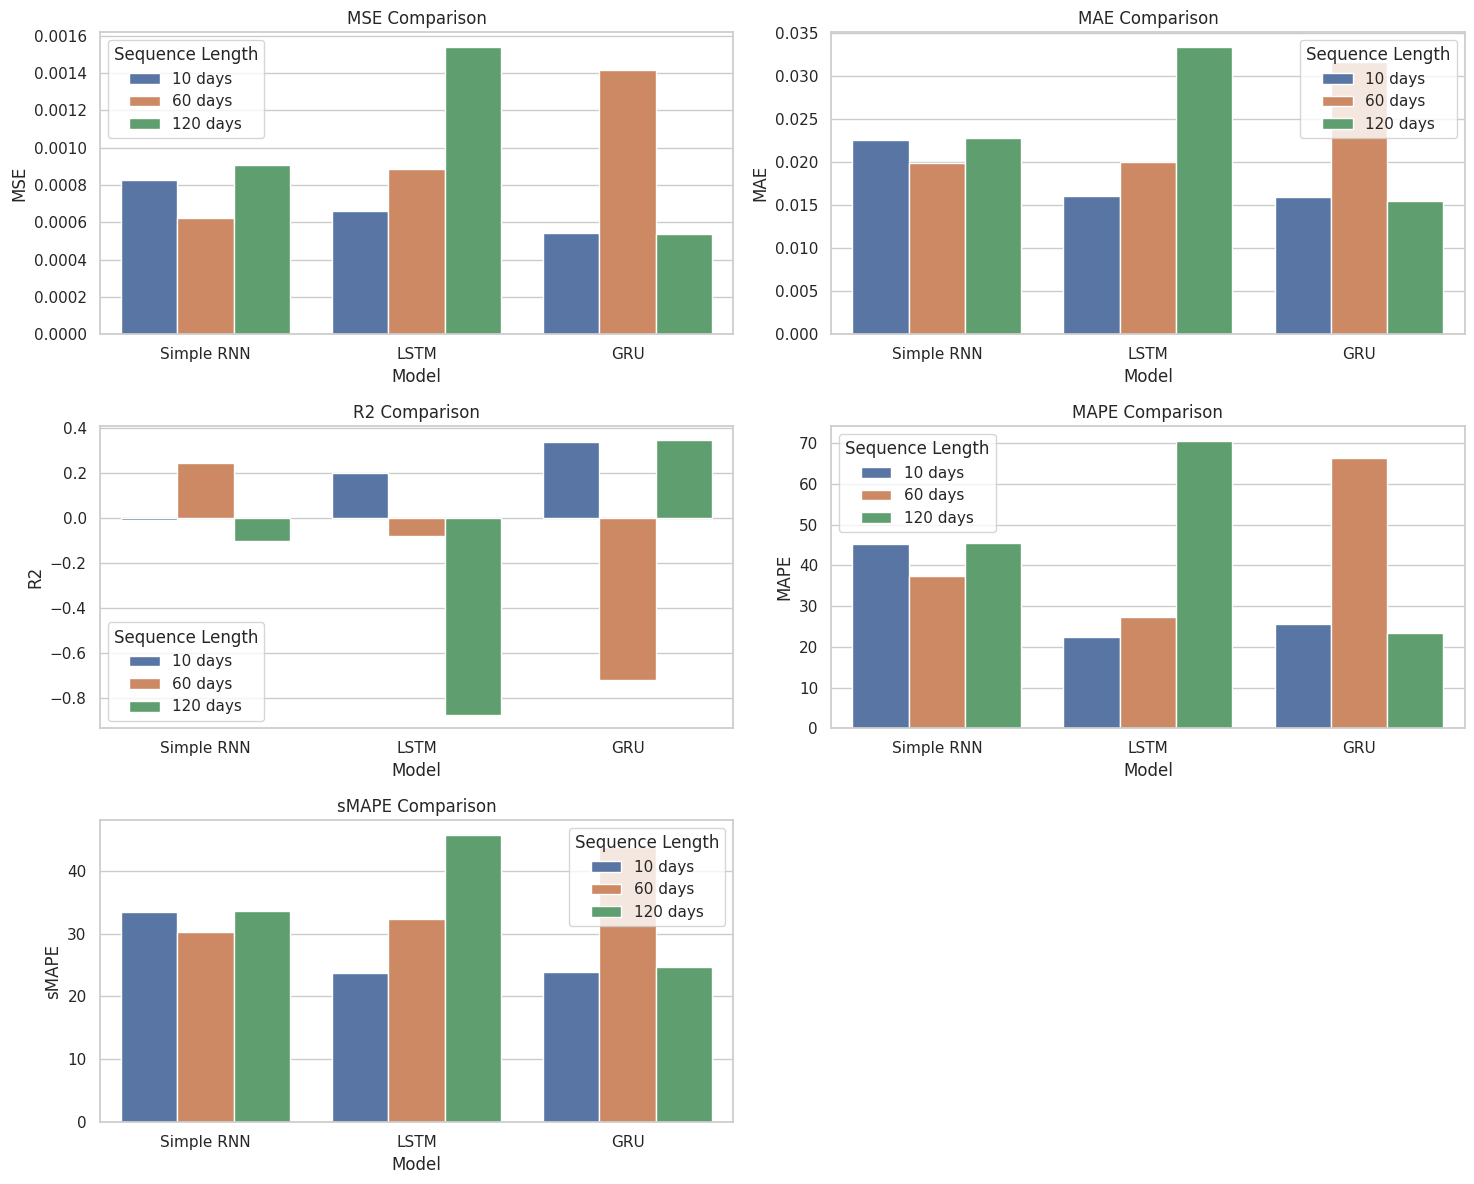

In [ ]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot MSE
sns.barplot(x='Model', y='MSE', hue='Sequence Length', data=df, ax=axes[0, 0])
axes[0, 0].set_title('MSE Comparison')

# Plot MAE
sns.barplot(x='Model', y='MAE', hue='Sequence Length', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MAE Comparison')

# Plot R2
sns.barplot(x='Model', y='R2', hue='Sequence Length', data=df, ax=axes[1, 0])
axes[1, 0].set_title('R2 Comparison')

# Plot MAPE
sns.barplot(x='Model', y='MAPE', hue='Sequence Length', data=df, ax=axes[1, 1])
axes[1, 1].set_title('MAPE Comparison')

# Plot sMAPE
sns.barplot(x='Model', y='sMAPE', hue='Sequence Length', data=df, ax=axes[2, 0])
axes[2, 0].set_title('sMAPE Comparison')

# Hide empty subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Analysis

1. **Key differences in performance between the SimpleRNN, LSTM, and GRU models?**

Answer : The GRU model outperformed both the SimpleRNN and LSTM model across various metrics majorly in MSE and MAE. Like, in the 10-day predictions, GRU had the lowest MSE at around 0.0005436, while SimpleRNN lagged behind at 0.0008281. This suggests that GRU is better at capturing complex patterns in the data, likely due to its effective gating mechanisms.
2. **Training time and resource usage comparion between the different models**

Answer : The GRU and LSTM models took a very little long to train than the SimpleRNN, as they involve more complex calculations. Though it performed better as well. The SimpleRNN was faster but didnt perform as wellcompared to the other two which justifies the performance here.


3. **The model with most accurate predixtions**

Answer : The GRU provided the most accurate predictions which I can see by its lower MSE and MAE values. It is good for long-term dependencies which is suitable for this task of time-series activity.
4. **Steps for pre-processing**

Answer : Creating sequences for model training, translating date columns to datetime format and normalizing the data using MinMaxScaler. These procedures are essential because they enhance the quality of the data and guarantee that the models can efficiently learn from past data. If I did not did this, then there was not be better predictions because the features would not be on a similar scal and properly formatted dates are essential for effective predictions.
5. **Implementation and Overall Approach**

Answer :  We must chose SimpleRNN, LSTM, and GRU based on their strengths in handling sequential data. The GRU was particularly effective, balancing performance with resources due to mainly it's architecture. The preprocessing I did ensured my models had a scaled and balanced data to learn from which impacts better prediction accuracy according to the target class closing price. Additionally I evaluated the performance of each model using metrics like Mean Squared Error and Mean Absolute Error. These evaluations helped me understand which model performs best under different conditions..
